In [1]:
import os
import sys

base_path = os.path.abspath('..')
base_path += '/'
sys.path.append(base_path)

In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns=999

Data has been sourced from https://armstransfers.sipri.org/ArmsTransfer/ImportExport.

In [6]:
df = pd.read_csv(base_path + "data/trade_register.csv")
print(df.shape)
df.head()

(59157, 17)


,SIPRI AT Database ID,Supplier,Recipient,Designation,Description,Armament category,Order date,Order date is estimate,Numbers delivered,Numbers delivered is estimate,Delivery year,Delivery year is estimate,Status,SIPRI estimate,TIV deal unit,TIV delivery values,Local production
0,61768,Belarus,Afghanistan,Mi-24V,combat helicopter,Aircraft,2018,No,4,No,2019,No,Second hand,8.50,3.40,13.60,No
1,52034,Bosnia-Herzegovina,Afghanistan,D-30 122mm,towed gun,Artillery,2009,No,60,Yes,2011,No,Second hand but modernized,0.35,0.23,13.86,No
2,58418,Bosnia-Herzegovina,Afghanistan,D-30 122mm,towed gun,Artillery,2012,Yes,20,No,2013,No,Second hand,0.35,0.14,2.80,No
3,53169,Brazil,Afghanistan,EMB-314 -,trainer/combat aircraft,Aircraft,2013,No,20,Yes,2016,No,New,4.50,4.50,90.00,No
4,60320,Brazil,Afghanistan,EMB-314 -,trainer/combat aircraft,Aircraft,2017,No,6,Yes,2018,No,New,4.50,4.50,27.00,No


In [8]:
df.rename(columns={'SIPRI AT Database ID':'ID', 'Order date':'Order year'}, inplace=True)
df=df[['ID', 'Supplier', 'Recipient', 'Armament category', 'Order year', 'Delivery year', 'Numbers delivered', 'SIPRI estimate', 'TIV delivery values']].copy()
df.head()

,ID,Supplier,Recipient,Armament category,Order year,Delivery year,Numbers delivered,SIPRI estimate,TIV delivery values
0,61768,Belarus,Afghanistan,Aircraft,2018,2019,4,8.50,13.60
1,52034,Bosnia-Herzegovina,Afghanistan,Artillery,2009,2011,60,0.35,13.86
2,58418,Bosnia-Herzegovina,Afghanistan,Artillery,2012,2013,20,0.35,2.80
3,53169,Brazil,Afghanistan,Aircraft,2013,2016,20,4.50,90.00
4,60320,Brazil,Afghanistan,Aircraft,2017,2018,6,4.50,27.00


In [9]:
regions = sorted(list(set(list(df.Supplier.unique()) + list(df.Recipient.unique()))))
regions[:5]

['ANC (South Africa)*', 'Afghanistan', 'African Union**', 'Albania', 'Algeria']

In [10]:
countries = [region for region in regions if ('unknown' not in region) and not region.endswith('*')]
countries[:5]

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda']

In [11]:
rebel_groups = [region for region in regions if ('unknown' not in region) and region.endswith('*') and not region.endswith('**')]
rebel_groups[:5]

['ANC (South Africa)*',
 'Amal (Lebanon)*',
 'Anti-Castro rebels (Cuba)*',
 'Armas (Guatemala)*',
 'Contras (Nicaragua)*']

In [12]:
orgs = [region for region in regions if ('unknown' not in region) and region.endswith('**')]
orgs

['African Union**',
 'European Union**',
 'NATO**',
 'OSCE**',
 'Regional Security System**',
 'United Nations**']

In [13]:
import pycountry

In [14]:
# country mapping
country_mapping = {}
pycountry_no_match = []
for country in countries:
    try:
        country_mapping[country] = pycountry.countries.search_fuzzy(country)[0].alpha_3
    except:
        pycountry_no_match.append(country)

SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='DJ-DJ', country_code='DJ', name='Djibouti', parent_code=None, type='City')
SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(code='GT-GU', country_code='GT', name='Guatemala', parent_code=None, type='Department')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='GN-ML', country_code='GN', name='Mali', parent='L', parent_code='GN-L', type='Prefecture')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='N

In [15]:
country_mapping

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Brunei': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'Congo': 'COG',
 'Costa Rica': 'CRI',
 "Cote d'Ivoire": 'CIV',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Cyprus': 'CYP',
 'Czechia': 'CZE',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominican Republic': 'DOM',
 'Ecuador': 'ECU',
 'Egypt': 'EGY',
 'El Salvador': 

In [16]:
pycountry_no_match

['Biafra',
 'Bosnia-Herzegovina',
 'Czechoslovakia',
 'DR Congo',
 'East Germany (GDR)',
 'Libya GNC',
 'North Yemen',
 'Northern Cyprus',
 'South Vietnam',
 'South Yemen',
 'Soviet Union',
 'UAE',
 'Yemen Arab Republic (North Yemen)',
 'Yugoslavia']

In [17]:
pycountry.countries.search_fuzzy("Bosnia")

[Country(alpha_2='BA', alpha_3='BIH', flag='🇧🇦', name='Bosnia and Herzegovina', numeric='070', official_name='Republic of Bosnia and Herzegovina')]

In [18]:
country_mapping['Bosnia-Herzegovina'] = "BIH"
pycountry_no_match.remove('Bosnia-Herzegovina')

In [19]:
pycountry.countries.search_fuzzy("Congo")

[Country(alpha_2='CG', alpha_3='COG', flag='🇨🇬', name='Congo', numeric='178', official_name='Republic of the Congo'),
 Country(alpha_2='CD', alpha_3='COD', flag='🇨🇩', name='Congo, The Democratic Republic of the', numeric='180')]

In [20]:
country_mapping['DR Congo'] = "COD"
pycountry_no_match.remove('DR Congo')

In [21]:
pycountry.countries.search_fuzzy("Libya")

[Country(alpha_2='LY', alpha_3='LBY', flag='🇱🇾', name='Libya', numeric='434', official_name='Libya')]

In [22]:
country_mapping['Libya GNC'] = "LBY"
pycountry_no_match.remove('Libya GNC')

In [23]:
pycountry.countries.search_fuzzy("Yemen")

[Country(alpha_2='YE', alpha_3='YEM', flag='🇾🇪', name='Yemen', numeric='887', official_name='Republic of Yemen')]

In [24]:
country_mapping['Yemen Arab Republic (North Yemen)'] = "YEM"
pycountry_no_match.remove('Yemen Arab Republic (North Yemen)')

In [25]:
pycountry.countries.search_fuzzy("United Arab Emirates")

[Country(alpha_2='AE', alpha_3='ARE', flag='🇦🇪', name='United Arab Emirates', numeric='784')]

In [26]:
country_mapping['UAE'] = "United Arab Emirates"
pycountry_no_match.remove('UAE')

In [27]:
pycountry_no_match

['Biafra',
 'Czechoslovakia',
 'East Germany (GDR)',
 'North Yemen',
 'Northern Cyprus',
 'South Vietnam',
 'South Yemen',
 'Soviet Union',
 'Yugoslavia']

In [28]:
former_countries = pycountry_no_match.copy()
countries = [country for country in countries if country not in former_countries]

In [29]:
def get_region_type(region):
    if region in countries:
        return 'Country'
    elif region in former_countries:
        return 'Former Country'
    elif region in orgs:
        return 'Organisation'
    elif region in rebel_groups:
        return 'Rebel Group' # check language here
    else:
        return 'Unknown'

In [30]:
df['Supplier_region_type'] = df['Supplier'].apply(lambda x: get_region_type(x))
df['Recipient_region_type'] = df['Recipient'].apply(lambda x: get_region_type(x))
df.head()

,ID,Supplier,Recipient,Armament category,Order year,Delivery year,Numbers delivered,SIPRI estimate,TIV delivery values,Supplier_region_type,Recipient_region_type
0,61768,Belarus,Afghanistan,Aircraft,2018,2019,4,8.50,13.60,Country,Country
1,52034,Bosnia-Herzegovina,Afghanistan,Artillery,2009,2011,60,0.35,13.86,Country,Country
2,58418,Bosnia-Herzegovina,Afghanistan,Artillery,2012,2013,20,0.35,2.80,Country,Country
3,53169,Brazil,Afghanistan,Aircraft,2013,2016,20,4.50,90.00,Country,Country
4,60320,Brazil,Afghanistan,Aircraft,2017,2018,6,4.50,27.00,Country,Country


Use pycountry fuzzy match to get rebel groups.

In [31]:
rebel_groups

['ANC (South Africa)*',
 'Amal (Lebanon)*',
 'Anti-Castro rebels (Cuba)*',
 'Armas (Guatemala)*',
 'Contras (Nicaragua)*',
 'Darfur rebels (Sudan)*',
 'ELF (Ethiopia)*',
 'EPLF (Ethiopia)*',
 'FAN (Chad)*',
 'FMLN (El Salvador)*',
 'FNLA (Angola)*',
 'FRELIMO (Portugal)*',
 'GUNT (Chad)*',
 'Haiti rebels*',
 'Hamas (Palestine)*',
 'Hezbollah (Lebanon)*',
 'Houthi rebels (Yemen)*',
 'Indonesia rebels*',
 'Khmer Rouge (Cambodia)*',
 'Kurdistan Regional Government (Iraq)*',
 'LF (Lebanon)*',
 'LRA (Uganda)*',
 'LTTE (Sri Lanka)*',
 'Lebanon Palestinian rebels*',
 'Libya HoR*',
 'MNLF (Philippines)*',
 'MPLA (Portugal)*',
 'MTA (Myanmar)*',
 'Mujahedin (Afghanistan)*',
 'NLA (Macedonia)*',
 'NTC (Libya)*',
 'Northern Alliance (Afghanistan)*',
 'PAIGC (Portugal)*',
 'PIJ (Israel/Palestine)*',
 'PKK (Turkiye)*',
 'PLO (Israel)*',
 'PRC (Israel/Palestine)*',
 'Pathet Lao (Laos)*',
 'Provisional IRA (UK)*',
 'RPF (Rwanda)*',
 'RUF (Sierra Leone)*',
 'SLA (Lebanon)*',
 'SNA (Somalia)*',
 'SPLA 

In [32]:
import re

In [33]:
rebel_group_mapping = {}

In [34]:
d = rebel_groups[0]
d

'ANC (South Africa)*'

In [35]:
re.search(r'\((.*?)\)', d).group(1)

'South Africa'

In [36]:
for group in rebel_groups:
    try:
        country = re.search(r'\((.*?)\)', group).group(1)
        rebel_group_mapping[group] = pycountry.countries.search_fuzzy(country)[0].alpha_3
    except:
        try:
            country = group.split(' ', 1)[0]
            rebel_group_mapping[group] = pycountry.countries.search_fuzzy(country)[0].alpha_3
        except:
            print(group)

SubdivisionHierarchy(code='GT-GU', country_code='GT', name='Guatemala', parent_code=None, type='Department')
PRC (Israel/Palestine)*


In [37]:
pycountry.countries.search_fuzzy("Palestine")[0].alpha_3

'PSE'

In [38]:
rebel_group_mapping['PIJ (Israel/Palestine)*']= 'PSE'
rebel_group_mapping['PRC (Israel/Palestine)*']= 'PSE'

In [39]:
former_countries

['Biafra',
 'Czechoslovakia',
 'East Germany (GDR)',
 'North Yemen',
 'Northern Cyprus',
 'South Vietnam',
 'South Yemen',
 'Soviet Union',
 'Yugoslavia']

In [40]:
former_country_mapping = {
    'Biafra':'NGA',
    'Czechoslovakia':'CZE',
    'East Germany (GDR)':'DEU',
    'North Yemen':'YEM',
    'Northern Cyprus':'CYP',
    'South Vietnam':'VNM',
    'South Yemen':'YEM',
    'Soviet Union':'RUS',
    'Yugoslavia':'SRB'
}

In [41]:
orgs

['African Union**',
 'European Union**',
 'NATO**',
 'OSCE**',
 'Regional Security System**',
 'United Nations**']

In [42]:
org_mapping = {
    'African Union**':'ETH',
    'European Union**':'BEL',
    'NATO**':'BEL',
    'OSCE**':'AUT',
    'Regional Security System**':'BRB',
    'United Nations**':'USA'
}

In [43]:
def assign_iso_a3_code_to_row(row):
    if row['Supplier_region_type'] == 'Country':
        row['Supplier_iso_a3'] = country_mapping[row['Supplier']]
    elif row['Supplier_region_type'] == 'Former Country':
        row['Supplier_iso_a3'] = former_country_mapping[row['Supplier']]
    elif row['Supplier_region_type'] == 'Organisation':
        row['Supplier_iso_a3'] = org_mapping[row['Supplier']]
    elif row['Supplier_region_type'] == 'Rebel Group':
        row['Supplier_iso_a3'] = rebel_group_mapping[row['Supplier']]


    if row['Recipient_region_type'] == 'Country':
        row['Recipient_iso_a3'] = country_mapping[row['Recipient']]
    elif row['Recipient_region_type'] == 'Former Country':
        row['Recipient_iso_a3'] = former_country_mapping[row['Recipient']]
    elif row['Recipient_region_type'] == 'Organisation':
        row['Recipient_iso_a3'] = org_mapping[row['Recipient']]
    elif row['Recipient_region_type'] == 'Rebel Group':
        row['Recipient_iso_a3'] = rebel_group_mapping[row['Recipient']]

    return row

In [44]:
df = df.apply(lambda row: assign_iso_a3_code_to_row(row), axis=1)
df[df['Recipient_region_type']=='Former Country'].head()

,Armament category,Delivery year,ID,Numbers delivered,Order year,Recipient,Recipient_iso_a3,Recipient_region_type,SIPRI estimate,Supplier,Supplier_iso_a3,Supplier_region_type,TIV delivery values
4863,Aircraft,1967,26163,1,1967,Biafra,NGA,Former Country,5.00,France,FRA,Country,2.0
4864,Aircraft,1969,25884,4,1969,Biafra,NGA,Former Country,0.25,France,FRA,Country,0.4
4865,Aircraft,1967,26271,2,1967,Biafra,NGA,Former Country,2.25,Portugal,PRT,Country,1.8
4866,Aircraft,1969,25230,5,1969,Biafra,NGA,Former Country,0.14,Sweden,SWE,Country,0.7
4867,Aircraft,1967,15909,1,1967,Biafra,NGA,Former Country,5.00,United States,USA,Country,2.0


In [1]:
import geopandas as gpd

In [2]:
naturalearth_lowres = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
naturalearth_lowres.head()

/tmp/ipykernel_1935/3403629583.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  naturalearth_lowres = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
world_map_data = naturalearth_lowres[['continent', 'name', 'iso_a3', 'geometry']].copy()
world_map_data = world_map_data[world_map_data['name']!='Antarctica']
world_map_data.head()

,continent,name,iso_a3,geometry
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


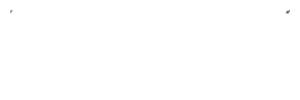

In [20]:
world_map_data.iloc[0].geometry

In [28]:
world_map_data.iloc[0].geometry.__geo_interface__

{'type': 'MultiPolygon',
 'coordinates': [(((180.0, -16.067132663642447),
    (180.0, -16.555216566639196),
    (179.36414266196414, -16.801354076946883),
    (178.72505936299711, -17.01204167436804),
    (178.59683859511713, -16.639150000000004),
    (179.0966093629971, -16.433984277547403),
    (179.4135093629971, -16.379054277547404),
    (180.0, -16.067132663642447)),),
  (((178.12557, -17.50481),
    (178.3736, -17.33992),
    (178.71806, -17.62846),
    (178.55271, -18.15059),
    (177.93266000000003, -18.28799),
    (177.38146, -18.16432),
    (177.28504, -17.72465),
    (177.67087, -17.381140000000002),
    (178.12557, -17.50481)),),
  (((-179.79332010904864, -16.020882256741224),
    (-179.9173693847653, -16.501783135649397),
    (-180.0, -16.555216566639196),
    (-180.0, -16.067132663642447),
    (-179.79332010904864, -16.020882256741224)),)]}

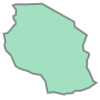

In [29]:
world_map_data.iloc[1].geometry

In [30]:
world_map_data.iloc[1].geometry.__geo_interface__

{'type': 'Polygon',
 'coordinates': (((33.90371119710453, -0.9500000000000001),
   (34.07261999999997, -1.0598199999999451),
   (37.69868999999994, -3.0969899999999484),
   (37.7669, -3.6771200000000004),
   (39.20222, -4.67677),
   (38.74053999999995, -5.9089499999999475),
   (38.79977000000008, -6.475660000000005),
   (39.44, -6.839999999999861),
   (39.47000000000014, -7.099999999999966),
   (39.19468999999998, -7.703899999999976),
   (39.25203000000005, -8.00780999999995),
   (39.18652000000009, -8.48550999999992),
   (39.53574000000009, -9.112369999999885),
   (39.94960000000003, -10.098400000000026),
   (40.316586229110854, -10.317097752817492),
   (40.31659000000002, -10.317099999999868),
   (39.52099999999996, -10.89688000000001),
   (38.42755659358775, -11.285202325081656),
   (37.827639999999974, -11.26878999999991),
   (37.471289999999954, -11.568759999999997),
   (36.775150994622805, -11.594537448780805),
   (36.51408165868426, -11.720938002166735),
   (35.31239790216904, -

In [31]:
naturalearth_lowres.explode().head()

/tmp/ipykernel_1935/553714498.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  naturalearth_lowres.explode().head()


pop_est continent       name iso_a3  gdp_md_est  \
0 0    889953.0   Oceania       Fiji    FJI        5496   
  1    889953.0   Oceania       Fiji    FJI        5496   
  2    889953.0   Oceania       Fiji    FJI        5496   
1 0  58005463.0    Africa   Tanzania    TZA       63177   
2 0    603253.0    Africa  W. Sahara    ESH         907   

                                              geometry  
0 0  POLYGON ((180.00000 -16.06713, 180.00000 -16.5...  
  1  POLYGON ((178.12557 -17.50481, 178.37360 -17.3...  
  2  POLYGON ((-179.79332 -16.02088, -179.91737 -16...  
1 0  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2 0  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...